# <center> **Pengantar OpenMC** </center> 

**Dhiya Salma Salsabila/24923304**

### **Pendahuluan**
**OpenMC** mensimulasikan partikel berupa **neutron dan foton** yang **bergerak secara stokastik (acak)** melalui sebuah **model yang di definisikan secara arbitrer (bebas)**.

<p>

Dalam reaktor nuklir, **neutron menjadi sangat penting karena dapat menyebabkan reaksi fisi**. Dengan mengetahui perilaku neutron maka dapat **menentukan seberapa sering reaksi fisi terjadi**. Hal ini juga **sebanding dengan energi yang dihasilkan**. 

#### **Deterministrik**
Dalam metode ini diselesaikan dengan persamaan yang dapat **menggambarkan perilaku rata-rata partikel** atau biasa di sebut dengan **persamaan transport neutron**
<p>

Persamaan ini merupakan **persamaan berdimensi tujuh (tiga dimensi untuk ruang, tiga untuk kecepatan, dan satu untuk waktu)** yang sangat sulit diselesaikan secara langsung. Untuk semua kasus, kecuali masalah yang paling sederhana, diperlukan beberapa bentuk diskretisasi. 
<p>

**Diskretisasi dilakukan dengan membagi seluruh ruang menjadi bagian-bagian kecil yang homogen**, kemudian menyelesaikan persamaan pada bagian-bagian kecil tersebut. Setelah melakukan diskretisasi dan berbagai pendekatan lainnya, kita dapat menghasilkan bentuk persamaan yang sesuai untuk diselesaikan dengan komputer. **Di antaranya adalah metode ordinat diskret, metode karakteristik, difusi beda hingga, dan metode nodal (pemecahan diferensial parsial)**.
<p>

**Kelebihan:**

- Kecepatan solusi: Tergantung pada metode yang digunakan, solusi dapat ditentukan dengan sangat cepat.
- Solusi global: Solusi yang dihasilkan adalah solusi global, artinya kita mengetahui perilaku rata-rata di seluruh domain.
- Kepastian solusi: Setelah masalah mencapai konvergensi, solusinya diketahui dengan pasti.
<p>

**Kekurangan:**

- Kerumitan model kompleks: Jika modelnya rumit, diperlukan pembuatan mesh yang canggih dan kompleks.
- Persiapan penampang multi-grup: Diperlukan penampang multi-grup yang memerlukan pengetahuan solusi sebelumnya (a priori).

#### **Monte Carlo**
Dalam metode ini menentukan perilaku rata-rata berbagai kuantitas fisik dalam suatu sistem
<p>

**Kelebihan:**

- Tanpa pembuatan mesh: Tidak diperlukan pembuatan mesh untuk membangun geometri. Dengan menggunakan constructive solid geometry (CSG), dimungkinkan untuk membuat model kompleks dengan permukaan melengkung.
- Fleksibilitas dalam penampang energi: Metode Monte Carlo dapat digunakan baik dengan penampang energi kontinu maupun multi-grup.
- Kemudahan simulasi paralel: Menjalankan simulasi secara paralel secara konsep sangat sederhana.
<p>

**Kekurangan:**

- Biaya komputasi tinggi: Karena bergantung pada pengambilan sampel acak berulang, metode ini memerlukan komputasi yang sangat mahal.
- Tidak otomatis memberikan solusi global: Simulasi tidak secara otomatis memberikan solusi global di seluruh domain – Anda harus secara spesifik meminta kuantitas yang diinginkan.
- Ketidakpastian stokastik: Bahkan setelah masalah mencapai konvergensi, diperlukan simulasi banyak partikel untuk mengurangi ketidakpastian stokastik.

#### **Satuan dalam OpenMC**
- Panjang : centimeter
- Energi : electronvolt
- Waktu : second

### **Install OpenMC**
[Video tutorial linux](https://www.youtube.com/watch?v=sCDT5ZAeJcY&t=83s)

[Tutorial Windows dengan WSL](https://www.et.byu.edu/~mjm82/che612/Winter2024/Homework/OpenMC_Installation_Guide.pdf)

### **Update Versi OpenMC**

1. **Update Repository OpenMC**
- cd ~/openmc  # Sesuaikan dengan lokasi instalasi OpenMC
- git fetch --all  # Ambil semua perubahan terbaru dari repository
- git tag # Mengecek versi yang tersedia
- git checkout v0.15.0  # Pindah ke versi terbaru
- git pull origin v0.15.0  # Pastikan kode terbaru diambil

2. **Build Ulang OpenMC**
- cd ~/openmc  # Sesuaikan dengan lokasi repository OpenMC Anda
- rm -rf build  # Hapus folder build lama (opsional tapi disarankan)
- mkdir build && cd build
- cmake ..
- make -j$(nproc)
- sudo make install  # Instal ulang

3. **Konfigurasi ke python untuk versi terbaru**
- pip uninstall openmc
- pip install --no-cache-dir .

4. **Cek versi**
- openmc --version
- git log -1

## <Center> **Konfigurasi Data Nuklir** </Center>
OpenMC menggunakan format HDF5, namun jika kita memiliki data dalam format ACE yang telah di olah NJOY seperti yang biasa di pakai dalam MCNP atau Serpent maka data tersebut harus di konversi terlebih dahulu ke HDF5.

##### **Mengolah format ACE**

In [ ]:
import openmc
# Contoh
u235 = openmc.data.IncidentNeutron.from_ace('92235.710nc')
u235.export_to_hdf5('U235.h5')

Jika terdapat beberapa file dengan format ACE untuk nuklida yang sama tetapi suhu yang berbeda maka dapat digunakan 

In [ ]:
# Interaksi neutron, untuk simulasi interaksi neutron dengan bahan pada berbagai suhu
u235 = openmc.data.IncidentNeutron.from_ace('92235.710nc')
for suffix in [711, 712, 713, 714, 715, 716]:
    u235.add_temperature_from_ace('92235.{}nc'.format(suffix))
u235.export_to_hdf5('U235.h5')

# Hamburan termal, untuk simulasi interaksi neutron dengan bahan pada suhu rendah, di mana efek hamburan termal signifikan
light_water = openmc.data.ThermalScattering.from_ace('lwtr.20t')
for suffix in range(21, 28):
    light_water.add_temperature_from_ace('lwtr.{}t'.format(suffix))
light_water.export_to_hdf5('lwtr.h5')

Setelah semua file ACE sudah di ubah ke dalam HDF5, maka file harus di ekspor ke dalam XML

In [ ]:
library = openmc.data.DataLibrary()
library.register_file('U235.h5')
library.register_file('lwtr.h5')
...
library.export_to_xml()

#### **Mengolah dari ENDF**

In [ ]:
# Contoh penambahan Zr-92, temperatur default 293.6 K
zr92 = openmc.data.IncidentNeutron.from_njoy('n-040_Zr_092.endf')

# Contoh penambahan dengan beberapa temperatur
zr92 = openmc.data.IncidentNeutron.from_njoy(
    'n-040_Zr_092.endf', temperatures=[300., 600., 1000.])

#### **Photon Cross Section**

In [ ]:
# Dari ACE
u = openmc.data.IncidentPhoton.from_ace('92000.12p')
u.export_to_hdf5('U.h5')

# Dari ENDF
u = openmc.data.IncidentPhoton.from_endf('photoat-092_U_000.endf',
                                         'atom-092_U_000.endf')

## <Center> **Struktur OpenMC** </Center>
untuk menjalanlan OpenMC, hal utama yang harus dilakukan ialah membuat file XML yang menggambarkan model yang akan disimulasikan. Ada 3 file yang diperlukan :
- **materials.xml**, file ini berisi **material apa yang ada dalam model** dan dari apa material tersebut terdiri. Selain itu, file ini menunjukkan di mana OpenMC harus mencari perpustakaan penampang lintang.
- **geometry.xml**, file ini menjelaskan bagaimana material yang **didefinisikan dalam materials.xml menempati wilayah ruang**. Volume fisik didefinisikan menggunakan geometri padat konstruktif, dijelaskan secara rinci dalam Mendefinisikan Geometri.
- **settings.xml**, file ini menunjukkan **mode apa yang harus dijalankan OpenMC**, berapa banyak partikel yang akan disimulasikan, definisi sumber, dan berbagai opsi lainnya.
- **tallies.xml**, file ini menjelaskan **kuantitas fisik apa yang harus dihitung selama simulasi (fluks, laju reaksi, arus, dll.)**.
- **plots.xml**, file ini memberikan **spesifikasi untuk menghasilkan plot irisan atau voxel dari geometri**.

In [ ]:
# Create materials
materials = openmc.Materials()
...
materials.export_to_xml()

# Create geometry
geometry = openmc.Geometry()
...
geometry.export_to_xml()

# Assign simulation settings
settings = openmc.Settings()
...
settings.export_to_xml()

## <center> **Material** </center>

Material dalam OpenMC didefinisikan sebagai sekumpulan nuklida/elemen dengan densitas tertentu dan dibuat menggunakan `openmc.Material`. Setelah sebuah material dibuat, nuklida dapat ditambahkan dengan `Material.add_nuclide()` dan elemen dapat ditambahkan dengan `Material.add_element()`. 
> **Densitas ditentukan menggunakan fraksi atom atau fraksi massa**
- **Elemen, zat kimia murni** yang terdiri dari atom dengan jumlah proton yang sama dalam intinya. Dicirikan oleh nomor atom (Z), misalnya: Hidrogen (H, Z=1), Karbon (C, Z=6), Uranium (U, Z=92).
- **Nuklida, inti atom tertentu yang ditentukan oleh jumlah proton (Z) dan neutron (N)**. misalnya: Uranium-235 (²³⁵U): Z = 92, N = 143, A = 235

#### **Penamaan Material**
**Nuklida**
- `SymA` di mana "A" adalah nomor massa (misalnya, Fe56)

**Elemen**
- `Sym0` (misalnya, Fe0 atau C0)

**Keadaan tereksitasi**
- `SymA_eN` (misalnya, V51_e1 untuk keadaan tereksitasi pertama Vanadium-51). Ini hanya digunakan dalam data peluruhan.

**Keadaan metastabil**
- `SymA_mN` (misalnya, Am242_m1 untuk keadaan tereksitasi pertama Americium-242).

**Senyawa**
- `c_String_Describing_Material` (misalnya, c_H_in_H2O). Digunakan untuk data hamburan termal.

In [ ]:
mat = openmc.Material()
# material Gd-152 dengan 0,5 persen atom
mat.add_nuclide('Gd152', 0.5, 'ao')

# contoh add_element
mat.add_element('C', 1.0)
mat.add_element('aluminium', 1.0)

Densitas yang ditentukan untuk setiap nuklida/elemen bersifat relatif dan akan dinormalisasi berdasarkan densitas total material. 

**Densitas total diatur menggunakan metode `Material.set_density()`**. 

Densitas dapat ditentukan dalam gram per sentimeter kubik (g/cm3), atom per barn-cm (atom/b-cm), atau kilogram per meter kubik (kg/m3).

- 'sum' → Kepadatan total dihitung dengan menjumlahkan kepadatan atom dari masing-masing nuklida.
- 'macro' → Menentukan kepadatan makroskopik langsung dalam satuan atoms/barn-cm.
- 'atom/b-cm' atau 'atom/barn-cm' → Kepadatan ditentukan dalam jumlah atom per barn-cm³.
- 'g/cm3' → Kepadatan dalam satuan gram per cm³.
- 'kg/m3' → Kepadatan dalam satuan kilogram per meter kubik.
- 'mol/cm3' → Kepadatan dalam satuan mol per cm³.

In [ ]:
# contoh sum
pu = openmc.Material()
pu.set_density('sum')
pu.add_nuclide('Pu239', 3.7047e-02)
pu.add_nuclide('Pu240', 1.7512e-03)
pu.add_nuclide('Pu241', 1.1674e-04)
pu.add_element('Ga', 1.3752e-03)
mats = openmc.Materials([pu])
mats.export_to_xml()

# contoh
mat.set_density('g/cm3', 10.5) # Menetapkan kepadatan dalam g/cm³
mat.set_density('atom/b-cm', 0.05) # Kepadatan dalam atom per barn-cm

OpenMC menyimpan data mengenai massa atom dan kelimpahan alami dari semua isotop yang diketahui, lalu menggunakan data ini untuk menentukan isotop mana yang harus ditambahkan ke material. Ketika material diekspor ke XML untuk digunakan oleh eksekusi OpenMC, elemen alami apa pun akan otomatis diubah menjadi isotop-isotop yang terjadi secara alami.

Metode `Material.add_element()` juga dapat digunakan untuk menambahkan uranium dengan tingkat pengayaan tertentu melalui argumen `enrichment`

In [ ]:
# uranium dengan pengayaan 3,2%
mat.add_element('U', 1.0, enrichment=3.2)

Pengayaan juga dapat dilakukan untuk elemen yang terdiri dari dua isotop alami (misalnya, Li atau B) dalam satuan persen atom. Untuk mengaktifkan ini, tambahkan argumen `enrichment_target` ke `Material.add_element()`.

In [ ]:
# Pengayaan B-10 hingga 30%
mat.add_element('B', 1.0, enrichment=30.0, enrichment_target='B10')

Untuk mengayakan suatu isotop dalam satuan persen massa (`wo%`), tambahkan argumen tambahan `enrichment_type`.

In [ ]:
# Pengayaan Li-6 hingga 15% berat
mat.add_element('Li', 1.0, enrichment=15.0, enrichment_target='Li6',
                enrichment_type='wo')

**Catatan**:
> Seringkali, pustaka penampang lintang tidak benar-benar memiliki semua isotop alami dari suatu elemen. Misalnya, dalam ENDF/B-VII.1, evaluasi penampang lintang tersedia untuk O-16 dan O-17 tetapi tidak untuk O-18. Jika OpenMC mengetahui pustaka penampang lintang yang akan Anda gunakan (melalui variabel lingkungan OPENMC_CROSS_SECTIONS), maka OpenMC akan mencoba hanya memasukkan isotop yang memiliki data penampang lintang dalam model. Dalam kasus oksigen pada ENDF/B-VII.1, kelimpahan O-18 akan digabungkan dengan O-16.

### **Thermal Scattering**

Jika terdapat material moderator seperti air atau grafit, maka harus ditetapkan data hamburan termal (yang disebut S(α,β)) menggunakan metode `Material.add_s_alpha_beta()`. 

Dalam simulasi fisika sangat penting karena tabel ini menyediakan data penampang atom terikat yang lebih akurat pada energi termal. Tanpa tabel ini, simulasi hanya akan menggunakan penampang atom bebas, yang tidak mencerminkan interaksi atom dalam keadaan terikat, seperti dalam molekul air.

`Material.add_s_alpha_beta()` membantu memperhitungkan efek-efek seperti hamburan dan penyerapan neutron oleh atom-atom yang terikat dalam molekul, yang sangat berbeda dari atom bebas.

Sebagai contoh, untuk memodelkan air ringan, Anda perlu menambahkan hidrogen dan oksigen ke dalam suatu bahan dan kemudian menetapkan data hamburan termal c_H_in_H2O.

In [ ]:
water = openmc.Material()
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
water.set_density('g/cm3', 1.0)

Selain itu ada metode tambahan untuk hamburan termal dengan menggunakan NCrystal. Dengan `Material.from_ncrystal()` dapat memasukkan data suhu, komposisi material, dan densitas.

In [ ]:
mat = openmc.Material.from_ncrystal('Al_sg225.ncmat;temp=300K')

**Catatan :**
> NCrystal hanya menangani interaksi neutron energi rendah. Interaksi lainnya disediakan oleh file ACE

### **Temperatur**

Dalam OpenMC, definisi material dipisahkan dari spesifikasi suhu. Jika tidak ada spesifikasi suhu sel atau material, suhu default global dapat diatur untuk diterapkan ke semua sel dan material. **Semua suhu harus diberikan dalam satuan Kelvin**

In [ ]:
hot_fuel = openmc.Material()
hot_fuel.temperature = 1200.0  # temperature in Kelvin

### **Material Campuran**

Di OpenMC, dimungkinkan untuk **mencampur sejumlah material untuk membuat material baru** dengan komposisi nuclide dan kerapatan yang benar. Metode `Material.mix_materials()` menerima daftar material dan daftar fraksi pencampurannya. **Fraksi pencampuran dapat diberikan sebagai fraksi atom, fraksi berat, atau fraksi volume. Jenis fraksi dapat ditentukan dengan memberikan 'ao', 'wo', atau 'vo'**

In [ ]:
fuel = openmc.Material()
fuel.add_nuclide("U235", 3.2E-2)

plutonium_oxide = openmc.Material()
plutonium_oxide.add_nuclide("Pu238", 1.7E-1)
plutonium_oxide.add_nuclide("O16", 1E-5)

mox_material = openmc.Material()
# Fraksi 0.97 mewakili 97% bahan bakar dan 0.03 mewakili 3% plutonium oksida berdasarkan berat, yang didefinisikan menggunakan fraksi berat (dengan parameter 'wo').
mox_material.mix_materials([fuel, plutonium_oxide], [0.97, 0.03], 'wo')

**Catatan:**
>  Jika fraksi menggunakan fraksi atom atau fraksi berat, fraksi harus berjumlah satu. Jika fraksi kurang dari satu, maka sisa fraksi akan ditetapkan sebagai material void (kosong).

Material dengan data hamburan termal S(α,β) tidak dapat langsung digunakan dalam metode `Material.mix_materials()`. Namun, dengan cara membuat material campuran terlebih dahulu menggunakan `mix_materials()` dan kemudian menambahkan data hamburan termal setelah material campuran tersebut dibuat.

In [ ]:
# Setelah membuat material campuran
mox_material = openmc.Material()
mox_material.mix_materials([fuel, plutonium_oxide], [0.97, 0.03], 'wo')

# Menambahkan data hamburan termal S(alpha, beta) ke material campuran
mox_material.add_s_alpha_beta('H_in_H2O', 300)  # Misalnya, data untuk hidrogen di air pada suhu 300 K

Dalam OpenMC **material harus dibuat dalam bentuk XML**, Kelas Materials berfungsi seperti daftar, sehingga material dapat ditambahkan dengan menggunakan metode seperti append(), atau melalui operator +=. Selanjutnya ekspor menjadi file berformat XML menggunakan metode `Materials.export_to_xml()`.

In [ ]:
# Membuat instansi Materials
materials = openmc.Materials()

# Menambahkan beberapa material ke koleksi
fuel_material = openmc.Material(1)
fuel_material.add_nuclide('U235', 1.0, 'wo')  # contoh penambahan isotop
materials.append(fuel_material)

moderator_material = openmc.Material(2)
moderator_material.add_nuclide('H1', 2.0, 'wo')  # contoh penambahan isotop
materials.append(moderator_material)

# Mengekspor koleksi material ke dalam file materials.xml
materials.export_to_xml('materials.xml')

# Atau
materials = openmc.Materials()
materials.append(water)
materials += [uo2, zircaloy]
materials.export_to_xml()

# Atau
materials = openmc.Materials([water, uo2, zircaloy])
materials.export_to_xml()

### **Cross Section**

OpenMC menggunakan file bernama cross_sections.xml untuk menunjukkan di mana data penampang lintang (cross section) dapat ditemukan di sistem file. File ini memiliki peran yang sama seperti xsdir untuk MCNP atau xsdata untuk Serpent.

OpenMC untuk menggunakan file tersebut dengan mengatur `Materials.cross_sections` atau dengan mengatur variabel lingkungan OPENMC_CROSS_SECTIONS ke path dari file cross_sections.xml.

In [ ]:
# Menetapkan path ke file cross_sections.xml dalam kelas Materials
materials = openmc.Materials()
materials.cross_sections = '/path/to/cross_sections.xml'

Pada bagian .profile di WSL harus di tambahkan

`export OPENMC_CROSS_SECTIONS=/path/to/cross_sections.xml`

## <center> **Geometri** </center>

Geometri model dalam OpenMC didefinisikan menggunakan constructive solid geometry (CSG), yang juga disebut geometri kombinatorial. CSG memungkinkan membuat wilayah yang kompleks menggunakan operator Boolean (interseksi, union, dan komplemen) pada wilayah yang lebih sederhana.

[refrensi_geometri](https://docs.openmc.org/en/stable/usersguide/geometry.html)

In [ ]:
sphere = openmc.Sphere(r=10.0)

# This is equivalent
sphere = openmc.Sphere()
sphere.r = 10.0

Setelah sebuah permukaan dibuat, half-space (setengah ruang) dapat diperoleh dengan menerapkan operator - atau +, yang masing-masing sesuai dengan negative half-space dan positive half-space.
- **Negative half-space (-surface)**: Berisi semua titik yang memenuhi persamaan **𝑓(𝑥,𝑦,𝑧)<0, yaitu area di dalam permukaan**.
- **Positive half-space (+surface)**: Berisi semua titik yang memenuhi persamaan **𝑓(𝑥,𝑦,𝑧)>0, yaitu area di luar permukaan**.

In [ ]:
sphere = openmc.Sphere(r=5.0)  # Membuat permukaan bola dengan jari-jari 5.0

inside_sphere = -sphere  # Ruang di dalam bola (negative half-space)
outside_sphere = +sphere  # Ruang di luar bola (positive half-space)

Instance dari openmc.Halfspace dapat digabungkan menggunakan operator Boolean berikut:
- **& (intersection)** → Menghasilkan wilayah yang merupakan **irisan dari dua atau lebih half-space**.
- **| (union)** → Menghasilkan wilayah yang merupakan **gabungan dari dua atau lebih half-space**.
- **~ (complement)** → Menghasilkan wilayah **komplemen dari suatu half-space (membalik inside ⇄ outside)**.

In [ ]:
# Mendefinisikan dua permukaan: bola dan silinder
sphere = openmc.Sphere(r=5.0)
cylinder = openmc.Cylinder(r=3.0, axis='z')

# Menggunakan operator Boolean
region_intersection = -sphere & -cylinder  # Wilayah di dalam bola dan di dalam silinder
region_union = -sphere | -cylinder  # Wilayah di dalam bola atau di dalam silinder
region_complement = ~(-sphere)  # Wilayah di luar bola

Operator & dapat dianggap sebagai logika AND, | sebagai logika OR, dan ~ sebagai logika NOT.

Sebagai contoh, membuat suatu wilayah yang terdiri dari −4 < z <−3 atau 3 < z < 4, kita dapat menggunakan operasi union (|):

In [ ]:
# Mendefinisikan dua bidang horizontal pada z = -4, z = -3, z = 3, dan z = 4
z_min1 = openmc.ZPlane(z0=-4)
z_max1 = openmc.ZPlane(z0=-3)
z_min2 = openmc.ZPlane(z0=3)
z_max2 = openmc.ZPlane(z0=4)

# Membuat dua region: -4 < z < -3 dan 3 < z < 4
region_1 = +z_min1 & -z_max1  # Wilayah antara z = -4 dan z = -3
region_2 = +z_min2 & -z_max2  # Wilayah antara z = 3 dan z = 4

# Menggabungkan kedua region menggunakan operator |
region_union = region_1 | region_2

# atau
region_bottom = +openmc.ZPlane(-4) & -openmc.ZPlane(-3)
region_top = +openmc.ZPlane(3) & -openmc.ZPlane(4)
combined_region = region_bottom | region_top

#### **Kondisi Batas**

Secara default, ketika sebuah surface dibuat dalam OpenMC, partikel yang melewatinya akan dianggap **transmisif, yaitu partikel dapat melewati permukaan dengan bebas**. Namun, perlu ditetapkan kondisi batas untuk partikel yang mencapai permukaan terluar.

**Jenis kondisi batas**:
- **Vacuum** → jika partikel mencapai batas ini akan **keluar dari sistem (hilang dari simulasi)**
- **Reflective** → jika partikel mencapai batas akan **memantul kembali tanpa kehilangan energi**
- **White** → mirip dengan **reflektif tetapi pantulan tidak selalu sejajar dengan sudut datang**
- **Periodic** → jika partikel mencapai batas ini maka akan **muncul kembali dari batas lainnya dengan orientasi yang sama**

untuk kondisi batas **reflective, periodic, dan white**, bisa diberikan nilai albedo untuk mengontol partikel setelah interaksi dengan batas.
- albedo = 1 → dipantulkan sepenuhnya tanpa kehilangan energi
- albedo < 1 → beberapa partikel diserap atau hilang
- albedo = 0 → tidak ada pantulan, semua partikel diserap

**Albedo adalah rasio partikel yang dipantulkan terhadap yang mengenai permukaan.**

In [ ]:
x1 = openmc.XPlane(1.0, boundary_type='reflective', albedo=0.667)

# Atau
x1 = openmc.XPlane(1.0)
x1.boundary_type = 'reflective'
x1.albedo = 0.667

#### **Cell**

Setelah membuat material dan mendefinisikan suatu wilayah dalam ruang, langkah selanjutnya adalah mendefinisikan sel yang menetapkan material ke wilayah tersebut. Sel dibuat menggunakan kelas `openmc.Cell`. Dalam contoh ini, sebuah objek `openmc.Material` ditetapkan ke atribut `Cell.fill`

In [ ]:
# Membuat material
uo2 = openmc.Material()
uo2.add_nuclide("U235", 3.2E-5)
uo2.add_nuclide("O16", 2.1E-8)
# Membuat area lingkaran dengan jari jari 3
pellet = openmc.Sphere(r=3)

# Membuat cell
fuel = openmc.Cell(fill=uo2, region=-pellet)

# Atau
fuel = openmc.Cell()
fuel.fill = uo2
fuel.region = pellet

Selain material, sebuah **sel juga dapat diisi dengan universe atau lattice.**

Jika sebuah **sel tidak memiliki isi (fill) atau diisi dengan None**, maka sel tersebut akan **dianggap sebagai "void" (kosong)**, yang berarti tidak ada material di dalamnya. Partikel dapat bergerak melalui sel ini tanpa mengalami tumbukan:

**Catatan:**
> Kelas seperti Halfspace, Intersection, Union, dan Complement, serta semua objek dari openmc.Region, dapat ditetapkan ke atribut Cell.region untuk mendefinisikan batas wilayah sel.

#### **Universe**

Universe, yaitu kumpulan sel yang dapat digunakan sebagai unit geometri yang berulang. Setidaknya harus ada satu "root" universe dalam model.

Untuk mendefinisikan sebuah universe, buat sebuah instance dari openmc.Universe, lalu tambahkan sel menggunakan metode `Universe.add_cells()` atau `Universe.add_cell()`.

In [ ]:
universe = openmc.Universe(cells=[cell1, cell2, cell3])

# atau
universe = openmc.Universe()
universe.add_cells([cell1, cell2])
universe.add_cell(cell3)

Setelah sebuah universe dibuat, kita bisa menggunakannya untuk menentukan sel atau material di lokasi tertentu menggunakan metode `Universe.find()`

#### **Lattices**

Banyak model transportasi partikel melibatkan struktur berulang dalam pola teratur, seperti kisi persegi panjang (rectangular lattice) atau heksagonal (hexagonal lattice). Jika harus mendefinisikan batas setiap sel yang diisi dengan universe, prosesnya akan sangat rumit. Oleh karena itu, OpenMC menyediakan cara untuk mendefinisikan struktur lattice melalui kelas `openmc.RectLattice` dan `openmc.HexLattice`.

1. **Rectangular Lattices**

$\;\;\;\;\;\;$  Kisi persegi panjang mendefinisikan array 2D atau 3D dari universe yang diisi ke dalam prisma berbentuk persegi panjang dengan ukuran yang sama. <br>
$\;\;\;\;\;\;$  Untuk membuat rectangular lattice, kita harus menentukan:
- **Koordinat sudut kiri bawah** dari kisi (`RectLattice.lower_left`).
- **Pitch kisi**, yaitu jarak antara pusat elemen kisi yang berdekatan (`RectLattice.pitch`).
- **Universes** yang mengisi setiap elemen kisi (`RectLattice.universes`).
- **Outer universe**, yaitu universe yang digunakan untuk mengisi posisi kisi di luar bagian yang sudah didefinisikan (`RectLattice.outer`).

In [ ]:
# Contoh 2D
lattice = openmc.RectLattice()
lattice.lower_left = (-7.5, -7.5)
lattice.pitch = (5.0, 5.0)
lattice.universes = [[u, u, u],
                     [u, u, u],
                     [u, u, u]]

# Contoh 3D
lat3d = openmc.RectLattice()
lat3d.lower_left = (-7.5, -7.5, -7.5)
lat3d.pitch = (5.0, 5.0, 5.0)
lat3d.universes = [
    [[u, u, u],
     [u, u, u],
     [u, u, u]],
    [[q, q, q],
     [q, q, q],
     [q, q, q]],
    [[z, z, z],
     [z, z, z],
     [z, z, z]]]

2. **Hexagonal Lattice**

$\;\;\;\;\;\;$ OpenMC juga memungkinkan pembuatan kisi heksagonal 2D dan 3D. Cara pembuatannya mirip dengan kisi persegi panjang, dengan beberapa perbedaan:
- Koordinat pusat kisi harus ditentukan (HexLattice.center).
- Untuk kisi 2D, hanya satu nilai pitch yang perlu diberikan (dalam daftar [pitch]). Untuk kisi 3D, kita harus memberikan pitch dalam arah radial dan aksial.
- Atribut HexLattice.universes tidak bisa diberikan dalam bentuk NumPy array.
- Atribut HexLattice.outer dapat digunakan untuk menentukan outer universe.

**Struktur Hexagonal Lattice**

$\;\;\;\;\;\;$  Pada kisi heksagonal 2D, HexLattice.universes diisi dengan daftar 2D yang menggambarkan isi setiap elemen kisi.
- Setiap sub-list mewakili satu ring dari universe, dengan urutan dari ring terluar ke dalam.
- Urutan universe dalam setiap sub-list dimulai dari posisi dengan y terbesar, lalu berputar searah jarum jam.

In [ ]:
# Contoh 2D
hexlat = openmc.HexLattice()
hexlat.center = (0, 0)
hexlat.pitch = [10]

outer_ring = [u, q, q, q, q, q, u, q, q, q, q, q]
middle_ring = [u, q, q, u, q, q]
inner_ring = [u]

hexlat.universes = [outer_ring, middle_ring, inner_ring]

Jika ingin membuat batas heksagonal yang terdiri dari 6 bidang datar, kita bisa menggunakan:

In [ ]:
hex_prism = openmc.model.HexagonalPrism(edge_length=10.0)

Mengecek cara menempatkan universe, bisa menggunakan:

In [ ]:
print(openmc.HexLattice.show_indices(3))

#### **Export model geometri**

Setelah selesai membangun geometri dengan membuat permukaan (surface), sel (cell), dan jika diperlukan lattice, langkah terakhir adalah membuat instance dari `openmc.Geometry` dan mengekspornya ke dalam file XML. File ini dapat dibaca oleh eksekusi OpenMC menggunakan metode `Geometry.export_to_xml()`.

In [ ]:
geom = openmc.Geometry([cell1, cell2, cell3])
geom.export_to_xml()

## <Center> **Execution Settings** </Center>

Setelah membuat material dan geometri untuk simulasi, langkah terakhir untuk memiliki model yang lengkap adalah menetapkan pengaturan eksekusi melalui kelas `openmc.Settings`.

Setidaknya, perlu ditentukan:
- Distribusi sumber (source distribution)
- Jumlah partikel yang akan dijalankan

Atribut `Settings.run_mode` menentukan mode eksekusi yang digunakan saat OpenMC dijalankan. OpenMC mendukung lima mode eksekusi berikut:

1. `eigenvalue`
- Menjalankan simulasi nilai eigen 𝑘 (keff) untuk menghitung multiplikasi neutron.
- Digunakan dalam perhitungan reaktor kritikalitas.
- Sumber awal hanya digunakan untuk generasi fisi pertama.

2. `fixed source`
- Menjalankan simulasi dengan sumber tetap, menggunakan sumber eksternal yang ditentukan pada `Settings.source`.
- Cocok untuk simulasi aktivasi, sumber neutron eksternal, atau deteksi radiasi.

3. `volume`
- Menjalankan perhitungan volume stokastik, biasanya digunakan untuk menentukan volume rata-rata material dalam suatu geometri.

4. `plot`
- Menghasilkan plot slice atau voxel untuk visualisasi geometri (lihat Geometry Visualization dalam dokumentasi OpenMC).

5. `particle restart`
- Menjalankan simulasi satu partikel dari file restart partikel sebelumnya.
Digunakan untuk debugging atau analisis jalur partikel tertentu.

In [ ]:
settings = openmc.Settings()
settings.run_mode = 'fixed source'

Jika `run_mode` tidak ditentukan, OpenMC akan menggunakan mode default `eigenvalue`.

Strategi eksekusi dalam OpenMC bergantung pada jenis simulasi yang dijalankan:
1. **Simulasi Sumber Tetap ('fixed source')**
- Total jumlah partikel sumber dibagi menjadi sejumlah batch.
- `Settings.batches` → Menentukan jumlah batch.
- `Settings.particles` → Menentukan jumlah partikel per batch.
2. **Simulasi Eigenvalue ('eigenvalue')**
- Partikel dikelompokkan dalam generasi fisi (fission generations).
- Beberapa generasi fisi dapat digabungkan dalam satu batch untuk keperluan statistik.
- `Settings.generations_per_batch` → Menentukan jumlah generasi fisi per batch.
- `Settings.inactive` → Menentukan jumlah batch awal yang diabaikan sebelum tally mulai dikumpulkan.
- Untuk rasio dominasi tinggi, menggunakan beberapa generasi per batch dapat mengurangi kesalahan dalam estimasi variansi, meningkatkan keakuratan interval kepercayaan.

In [ ]:
settings.particles = 10000
settings.generations_per_batch = 10
settings.batches = 150
settings.inactive = 5

Jumlah batch dalam simulasi Monte Carlo mengacu pada pembagian keseluruhan riwayat partikel ke dalam beberapa kelompok (batch) untuk tujuan pengolahan statistik.
Untuk simulasi nilai eigen 𝑘, partikel dikelompokkan ke dalam generasi fisi, seperti yang dijelaskan dalam perhitungan nilai eigen. Secara default, satu batch hanya terdiri dari satu generasi fisi, tetapi ini dapat diubah dengan atribut `Settings.generations_per_batch`. 

**Fungsi Jumlah Batch dalam Simulasi Monte Carlo:**
1. Meningkatkan Estimasi Statistik:
- Dalam simulasi Monte Carlo, hasil dihitung berdasarkan sampel acak. Dengan membagi simulasi menjadi beberapa batch, statistik seperti rata-rata dan varians dapat dihitung dengan lebih baik.

2. Mengurangi Korelasi Antar Sampel:
- Dalam perhitungan nilai eigen 𝑘, korelasi antar generasi fisi dapat menyebabkan bias dalam estimasi varians. Dengan menggunakan beberapa batch, korelasi ini dapat dikurangi.

3. Memungkinkan Pemanasan (Burn-in) Simulasi:
- Pada awal simulasi, distribusi sumber mungkin belum mencapai kondisi stabil. Oleh karena itu, beberapa batch pertama bisa dibuang (disebut inactive batches) agar hasil perhitungan lebih representatif.

**Jumlah Batch dalam Dua Jenis Simulasi:**
1. Simulasi Sumber Tetap:
- Jumlah batch (Settings.batches) menentukan berapa banyak kelompok sejarah partikel yang digunakan untuk estimasi.
Misalnya, jika total simulasi menjalankan 1 juta partikel dan ada 100 batch, maka setiap batch akan mensimulasikan 10.000 partikel.

2. Simulasi Nilai Eigen 𝑘:
- Batch dapat terdiri dari beberapa generasi fisi.
Jika menggunakan 10 generasi per batch dan ada 150 batch, maka total simulasi melibatkan 10 × 150 = 1500 generasi fisi.
Beberapa batch awal dapat dibuang untuk menghindari hasil yang dipengaruhi oleh distribusi sumber yang belum konvergen.

## <Center> **Tally** </Center>

**Tally digunakan untuk mengukur besaran fisika selama simulasi transportasi partikel, seperti fluks neutron, laju reaksi fisi, atau pemanasan**. Tally memungkinkan kita untuk mengumpulkan data dari partikel yang disimulasikan.

**Komponen Input untuk Tally**
1. Score
> Menentukan jenis besaran fisika yang akan diukur. Contoh nilai score yang umum:
- `flux`: Fluks neutron.
- `fission`: Laju reaksi fisi.
- `absorption`: Laju penyerapan neutron.
- `(n,gamma)`: Laju reaksi tangkapan neutron (capture).
- `heating`: Pemanasan lokal akibat reaksi.

2. Filter
> Membatasi ruang fase (spasial, energi, waktu, dll.) di mana tally berlaku. Jenis filter yang umum:
- Spatial:
1. `CellFilter`: Berdasarkan sel geometri.
2. `MaterialFilter`: Berdasarkan material.
3. `SurfaceFilter`: Berdasarkan permukaan.

- Energi:
1. `EnergyFilter`: Spektrum energi neutron (misal: grup energi).
2. `EnergyoutFilter`: Energi neutron setelah tumbukan.

- Lainnya:
1. `TimeFilter`: Untuk simulasi bergantung waktu.
2. `UniverseFilter`: Berdasarkan universe dalam geometri.

In [ ]:
# Buat filter sel dan energi
cell_filter = openmc.CellFilter([1, 2])  # ID sel yang ingin di-tally
energy_filter = openmc.EnergyFilter([0, 1e6, 20e6])  # Batas grup energi (dalam eV)

# Buat tally
tally = openmc.Tally(name='flux_in_cell')
tally.id = 1
tally.filters = [cell_filter, energy_filter]
tally.scores = ['flux']
tally.nuclides = ['U235']  # Opsional, jika diperlukan

# Tambahkan ke objek Tallies
tallies = openmc.Tallies([tally])

**Catatan:**
>Tally hanya berfungsi jika geometri, material, dan sumber partikel telah didefinisikan dengan benar. Untuk tally energi, pastikan grup energi sesuai dengan grup (misal: termal, cepat).

### **Trik cepat paham OpenMC**

Jika sudah terbiasa dalam bahasa pemrograman openmc menyediakan python API, dimana setiap dokumentasi dituliskan dan dapat diakses dengan fitur `help()`.

[OpenMC API](https://docs.openmc.org/en/stable/pythonapi/index.html)

In [ ]:
# Contoh
import openmc
help(openmc.Material.mix_materials)

# <center> **Latihan OpenMC** </center> 

Referensi dalam latihan ini diambil dari
- Criticality Calculations with $MCNP5^{TM}$: A Primer

Nilai Keff MCNP
- Kasus I Jezebel : 0.99902 ± 0.00057
- Kasus II Pu Silinder : 1.01403 ± 0.00066
- Kasus III Thermal Neutron Scattering : 0.99842 ± 0.00077
- Kasus IV Simple Repeated Structures : 1.00803 ± 0.00091
- Kasus V Hexahedral Lattice : 0.98536 ± 0.00102 
- Kasus VI Hexagonal Lattice : 1.01637 ± 0.00267

Nilai Keff OpenMC
- Kasus I Jezebel : 0.99963 ± 0.00014
- Kasus II Pu Silinder : 1.01818 ± 0.00139
- Kasus III Thermal Neutron Scattering : 0.98207 ± 0.00110
- Kasus IV Simple Repeated Structures : 1.04916 ± 0.00102
- Kasus V Hexahedral Lattice : 0.98936 ± 0.00023 
- Kasus VI Hexagonal Lattice : 1.02826 ± 0.00024

### **Kasus I : Jezebel**
Jezebel adalah nama kode untuk sebuah eksperimen nuklir kritis (criticality experiment) yang dilakukan di Los Alamos National Laboratory pada tahun 1950-an. Eksperimen ini bertujuan untuk mempelajari perilaku reaksi fisi nuklir dalam sistem inti plutonium-239 (Pu-239) murni tanpa bahan moderator.

Parameter :
1. Bola logam Pu: jari-jari = 6,3849 cm
- $N_{239}$ = Kerapatan atom $Pu^{239}$ 3,7047e-2 atom/barn-cm
- $N_{240}$ = Kerapatan atom $Pu^{240}$ 1,7512e-3 atom/barn-cm
- $N_{241}$ = Kerapatan atom $Pu^{241}$ 1,1674e-4 atom/barn-cm
- $N_{Ga}$ = Kerapatan atom Ga 1,3752e-3 atom/barn-cm
2. Lapisan nikel berbentuk bola: Ketebalan = 0,0127 cm
- $N_{Ni}$ = Kerapatan atom Ni 9,3122e-2 atom/barn-cm

In [ ]:
import openmc

# Mendefinisikan material
# Membuat bola logam Pu
Pu_metal_sphere = openmc.Material()
Pu_metal_sphere.add_nuclide("Pu239", 3.7047E-2)
Pu_metal_sphere.add_nuclide("Pu240", 1.7512E-3)
Pu_metal_sphere.add_nuclide("Pu241", 1.1674E-4)
Pu_metal_sphere.add_element("Ga", 1.3752E-3)
# Membuat lapisan nikel
Spherical_nickel_coating = openmc.Material()
Spherical_nickel_coating.add_element("Ni", 9.3122E-2)
# Ekspor ke format XML
materials = openmc.Materials([Pu_metal_sphere, Spherical_nickel_coating])
materials.export_to_xml()

# Membuat geometri
# Membuat bola logam Pu dengan jari jari 6,3849
Pu_sphere = openmc.Sphere(r=6.3849, boundary_type='vacuum')
fuel = openmc.Cell(name="fuel")
fuel.fill = Pu_metal_sphere
fuel.region = -Pu_sphere
# Membuat lapisan nikel dengan jari-jari 6.3976
Nickel_coating = openmc.Sphere(r=6.3976)
coating = openmc.Cell(name="coating")
coating.fill = Spherical_nickel_coating
coating.region = -Nickel_coating
# Ekspor ke format XML
geom = openmc.Geometry([fuel, coating])
geom.export_to_xml()

# Pengaturan simulasi
settings = openmc.Settings()
settings.batches = 200          # Total generasi
settings.inactive = 10          # Generasi yang diabaikan
settings.particles = 100000     # Jumlah neutron per generasi
settings.export_to_xml()

# Menjalankan simulasi
openmc.run()

### **Kasus II : Pu Silinder**
Parameter
1. Plutonium Material
- 100 persen Pu-239
- $\rho$ = 15.8 g/cc

Geometri

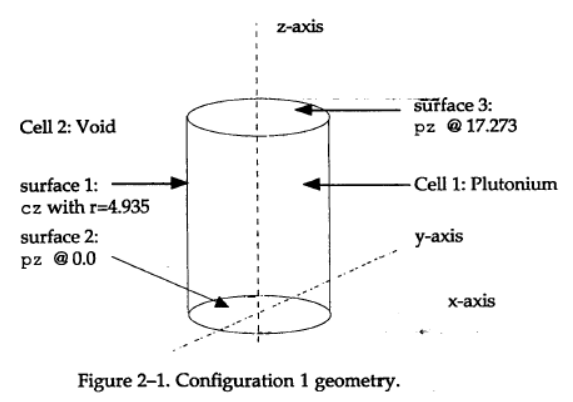

In [ ]:
import openmc

Pu = openmc.Material()
Pu.add_nuclide("Pu239", 1.0, "wo")
Pu.set_density("g/cc", 15.8)
#Pu.export_to_xml()

materials = openmc.Materials([Pu])
materials.export_to_xml()

Pu_cylinder = openmc.ZCylinder(r=4.935, boundary_type='vacuum')
tinggi = openmc.ZPlane(z0=17.273, boundary_type='vacuum')
alas = openmc.ZPlane(z0=0, boundary_type='vacuum')

cylinder = openmc.Cell(fill=Pu, region=(-Pu_cylinder & -tinggi & +alas))
geom = openmc.Geometry([cylinder])
geom.export_to_xml()

# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 5000        # Jumlah neutron per generasi
#settings.keff_guess = 1.0         # Tebakan awal keff
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.Source()
source.space = openmc.stats.Point((0, 0, 8.6))  
settings.source = source

settings.export_to_xml()

# Run
openmc.run()

### **Kasus III : Thermal Neutron Scattering**

In [ ]:
import openmc

# weight fraction "wo"
UO2F2 = openmc.Material(name="UO2F")
UO2F2.add_nuclide("H1", 5.7058E-2, "ao")
UO2F2.add_nuclide("O16", 3.2929E-2, "ao")
UO2F2.add_nuclide("F19", 4.3996E-3, "ao")
UO2F2.add_nuclide("U238", 2.0909E-3, "ao")
UO2F2.add_nuclide("U235", 1.0889E-4, "ao")
UO2F2.set_density("atom/b-cm", 9.6586E-2)
# UO2F2.add_s_alpha_beta("c_H_in_H2O")
# UO2F2.set_temperature= 300

Air = openmc.Material(name="Air")
Air.add_element("H", 2)
Air.add_element("O", 1)
Air.set_density('g/cc', 1.0)
Air.add_s_alpha_beta("c_H_in_H2O")

Al = openmc.Material(name="Aluminium")
Al.add_element("Al", 1)
Al.set_density("g/cc", 2.7)

materials = openmc.Materials([UO2F2, Air, Al])
materials.export_to_xml()

material_colors = {UO2F2 : 'black', Air : 'blue', Al : 'red'}
# !cat materials.xml

UO2F_Cylinder = openmc.ZCylinder(r=20.12)
Al_Cylinder = openmc.ZCylinder(r=20.2787, boundary_type='vacuum')
b_UO2F = openmc.ZPlane(z0=0)
t_UO2F = openmc.ZPlane(z0=100)
b_Al = openmc.ZPlane(z0=-0.1587, boundary_type='vacuum')
t_Al = openmc.ZPlane(z0=110, boundary_type='vacuum')

Fuel = -UO2F_Cylinder & +b_UO2F & -t_UO2F
Clad = (+UO2F_Cylinder & -Al_Cylinder & +b_Al & -t_Al) | (-UO2F_Cylinder & +b_Al & -b_UO2F)
# Moderator = +Al_Cylinder & +b_Al & -t_Al
Void = -UO2F_Cylinder & +t_UO2F & -t_Al

UO2F_cell = openmc.Cell(fill=UO2F2, region=(Fuel))
Al_cell = openmc.Cell(fill=Al, region=(Clad))
# Air_cell = openmc.Cell(fill=Air, region=(Moderator))
Void_cell = openmc.Cell(region=(Void))

geom = openmc.Geometry([UO2F_cell, Al_cell, Void_cell]) # , Air_cell
geom.export_to_xml()

#!cat geometry.xml

# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 5000         # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.Source()
source.space = openmc.stats.Point((0, 0, 50.0))  
settings.source = source

settings.export_to_xml()

# Run
openmc.run()

### **Kasus IV : Simple Repeated Structures**
Latihan menggunakan lattice

In [ ]:
import openmc
import openmc.stats

Uranium = openmc.Material(name="Uranium")
Uranium.add_nuclide("H1", 6.221E-2)
Uranium.add_nuclide("O16", 3.3621E-2)
Uranium.add_nuclide("F19", 2.5161E-3)
Uranium.add_nuclide("U235", 1.1760E-3)
Uranium.add_nuclide("U238", 8.2051E-5)
Uranium.add_s_alpha_beta("c_H_in_H2O")

Aluminium = openmc.Material(name="Aluminium")
Aluminium.add_element("Al", 1)
Aluminium.set_density("g/cc", 2.7)

Air = openmc.Material(name="Air")
Air.add_element("H", 2)
Air.add_element("O", 1)
Air.set_density('g/cc', 1.0)
Air.add_s_alpha_beta("c_H_in_H2O")

materials = openmc.Materials([Uranium, Aluminium, Air])
materials.export_to_xml()

material_colors = {Uranium : 'red', Aluminium : 'black', Air : 'blue'}

#Bahan bakar
panjang_uranium = 70.2
panjang_al = 80
Uranium_Silinder = openmc.ZCylinder(r=6.35)
Aluminium_Silinder = openmc.ZCylinder(r=6.50)
t_U = openmc.ZPlane(z0=panjang_uranium/2)
b_U = openmc.ZPlane(z0=-panjang_uranium/2)
t_Al = openmc.ZPlane(z0=panjang_al/2, boundary_type='vacuum')
b_Al = openmc.ZPlane(z0=-panjang_al/2)

#Kubus
panjang = 60
lebar = 53
tinggi = 100
kiri = openmc.XPlane(x0=-panjang/2, boundary_type='vacuum')
kanan = openmc.XPlane(x0=panjang/2, boundary_type='vacuum')
depan = openmc.YPlane(y0=-lebar/2, boundary_type='vacuum')
belakang = openmc.YPlane(y0=lebar/2, boundary_type='vacuum')
bawah = openmc.ZPlane(z0=panjang_al/2-tinggi, boundary_type='vacuum')

kubus = +kiri & -kanan & +depan & -belakang & +bawah & -t_Al

# Region bahan bakar dan Clad
Fuel = -Uranium_Silinder & +b_U & -t_U
Clad = +Uranium_Silinder & -Aluminium_Silinder & +b_Al & -t_Al | -Uranium_Silinder & +b_Al & -b_U
void = -Uranium_Silinder & +t_U & -t_Al 
SurroundingWater = +Aluminium_Silinder | -b_Al | +t_Al

# Cell bahan bakar dan clad
Uranium_cell = openmc.Cell(fill=Uranium, region=Fuel)
Al_cell = openmc.Cell(fill=Aluminium, region=Clad)
Void_cell = openmc.Cell(region=void)
SurroundingWater_cell = openmc.Cell(fill=Air, region=SurroundingWater)

uranium_universe = openmc.Universe(cells=[Uranium_cell, Al_cell, Void_cell, SurroundingWater_cell])

# Air di luar bahan bakar
Air_cell = openmc.Cell(fill=Air)
Air_universe = openmc.Universe(cells=[Air_cell])

# Lattice untuk 2 silinder bahan bakar
lattice = openmc.RectLattice()
lattice.lower_left = (-20, -10) #-panjang/2, -lebar/2
lattice.pitch = (15.0, 20.0)
lattice.universes = [[uranium_universe, uranium_universe]] #, [uranium_universe]
lattice.outer = Air_universe

Kubus_cell = openmc.Cell(fill=lattice, region=kubus)
kubus_universe = openmc.Universe(cells=[Kubus_cell])

geom = openmc.Geometry(kubus_universe)
geom.export_to_xml()

# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 5000         # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.IndependentSource()
source.space = openmc.stats.Point((0, 0, 35)) 
source2 = openmc.IndependentSource()
source2.space =  openmc.stats.Point((17, 0, 35)) 
settings.source = [source, source2]

settings.export_to_xml()

# Run
openmc.run() #geometry_debug=True

### **Kasus V : Hexahedral Lattice**

In [ ]:
import openmc
import openmc.statepoint
import openmc.stats

Plutonium_nitrate = openmc.Material(name="Plutonium Nitrate")
Plutonium_nitrate.add_nuclide("Pu239", 2.7682E-4)
Plutonium_nitrate.add_nuclide("Pu240", 1.2214E-5)
Plutonium_nitrate.add_nuclide("Pu241", 8.3390E-7)
Plutonium_nitrate.add_nuclide("Pu242", 4.5800E-8)
Plutonium_nitrate.add_element("H", 6.0070E-2)
Plutonium_nitrate.add_element("O", 3.6540E-2)
Plutonium_nitrate.add_element("N", 2.3699E-3)
Plutonium_nitrate.add_s_alpha_beta("c_H_in_H2O")
Plutonium_nitrate.set_density("sum", 9.9270E-2)

Stainless_steel = openmc.Material(name="Stainless Steel")
Stainless_steel.add_element("Fe", 6.3310E-2)
Stainless_steel.add_element("Cr", 1.6540E-2)
Stainless_steel.add_element("Ni", 6.5100E-3)
Stainless_steel.set_density("sum", 8.6360E-2)

materials = openmc.Materials([Plutonium_nitrate, Stainless_steel])
materials.export_to_xml()

material_colors = {Plutonium_nitrate : 'red', Stainless_steel : 'black'}

#Bahan Bakar
inner_diameter = 24.98
tank_thickness = 0.6
Jari_jari_plutoniumnitrate = inner_diameter/2
Jari_jari_SS = (inner_diameter+2*tank_thickness)/2
Panjang_plutoniumnitrate = 39.24
Panjang_SS = 101.70
surface_separation = 10
pitch = surface_separation+inner_diameter+2*tank_thickness

Plutonium_silinder = openmc.ZCylinder(r=Jari_jari_plutoniumnitrate)
SS_silinder = openmc.ZCylinder(r=Jari_jari_SS)
t_Pu = openmc.ZPlane(z0=-((Panjang_SS-1)/2-Panjang_plutoniumnitrate))
b_Pu = openmc.ZPlane(z0=-(Panjang_SS-1)/2)
t_SS = openmc.ZPlane(z0=Panjang_SS/2)
b_SS = openmc.ZPlane(z0=-Panjang_SS/2)
t_SSalas = openmc.ZPlane(z0=-Panjang_SS/2+1, boundary_type='vacuum')
b_SSalas = openmc.ZPlane(z0=-Panjang_SS/2, boundary_type='vacuum')
t_SStutup = openmc.ZPlane(z0=Panjang_SS/2+1, boundary_type='vacuum')
b_SStutup = openmc.ZPlane(z0=Panjang_SS/2, boundary_type='vacuum')

#Kubus
boundary_width = ((inner_diameter+2*tank_thickness)*3+surface_separation*3)/2
boundary_length = ((inner_diameter+2*tank_thickness)*2+surface_separation*2)/2
boundary_height =  (Panjang_SS)/2
kiri = openmc.XPlane(x0=-boundary_width, boundary_type='vacuum')
kanan = openmc.XPlane(x0=boundary_width, boundary_type='vacuum')
depan = openmc.YPlane(y0=-boundary_length, boundary_type='vacuum')
belakang = openmc.YPlane(y0=boundary_length, boundary_type='vacuum')
bawah = openmc.ZPlane(z0=boundary_height, boundary_type='vacuum')
atas = openmc.ZPlane(z0=-boundary_height, boundary_type='vacuum')

kubus = +kiri & -kanan & +depan & -belakang & -bawah & +atas

Fuel = -Plutonium_silinder & -t_Pu & +b_Pu 
SS = +Plutonium_silinder & -SS_silinder & -t_SS & +b_SS | -SS_silinder & -t_SSalas & +b_SSalas | -SS_silinder & -t_SStutup & +b_SStutup
Void = -Plutonium_silinder & +t_Pu & -t_SS
Void_outter = +SS_silinder | -b_SS | +t_SS

# Cell bahan bakar dan clad
Fuel_cell = openmc.Cell(fill=Plutonium_nitrate, region=Fuel)
SS_cell = openmc.Cell(fill=Stainless_steel, region=SS)
Void1_cell = openmc.Cell(region=Void)
Void2_cell = openmc.Cell(region=Void_outter)

Plutonium_universe = openmc.Universe(cells=[Fuel_cell, SS_cell, Void1_cell, Void2_cell]) 

# Void di luar bahan bakar
Void_cell = openmc.Cell()
Void_universe = openmc.Universe(cells=[Void_cell])

# Lattice untuk 2 silinder bahan bakar
lattice = openmc.RectLattice()
lattice.lower_left = (-boundary_width, -boundary_length) #-panjang/2, -lebar/2
lattice.pitch = (pitch, pitch)
lattice.universes = [[Plutonium_universe, Plutonium_universe, Plutonium_universe], 
                     [Plutonium_universe, Plutonium_universe, Plutonium_universe]]
lattice.outer = Void_universe

Kubus_cell = openmc.Cell(fill=lattice, region=kubus)
kubus_universe = openmc.Universe(cells=[Kubus_cell])

geom = openmc.Geometry(kubus_universe)
geom.export_to_xml()

# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 100000       # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

koordinat = [[35.58,     -25.58, -19.62], [0,    30.58, -19.62], [-35.58,   25.58, -19.62],
             [-35.58,     -25.58, -19.62], [0,    -30.58, -19.62], [-35.58,   -25.58, -19.62]]
sources = {}

for i, pos in enumerate(koordinat):
    source = openmc.IndependentSource()
    source.space = openmc.stats.Point(pos)
    sources[f"source{i}"] = source
settings.source = list(sources.values())

settings.export_to_xml()
#!cat settings.xml

# Run the simulation
openmc.run()

### **Kasus VI : Hexagonal Lattice**

In [ ]:
import openmc

UF = openmc.Material(name="Uranium Fluoride")
UF.add_nuclide("U235", 1.3784E-3)
UF.add_nuclide("U238", 9.9300E-5)
UF.add_element("H", 6.1063E-2)
UF.add_element("O", 3.3487E-2)
UF.add_element("F", 2.9554E-3)
UF.set_density("sum")
#UF.add_s_alpha_beta("c_H_in_H2O")

Al = openmc.Material(name="Aluminum")
Al.add_element("Al", 1)
Al.set_density("g/cc", 2.70)

Water = openmc.Material(name="Water")
Water.add_nuclide("H1", 2)
Water.add_nuclide("O16", 1)
Water.set_density('g/cc', 1.0)
#Water.add_s_alpha_beta("c_H_in_H2O")

materials = openmc.Materials([UF, Al, Water])
materials.export_to_xml()

material_colors = {UF : 'red', Al : 'black', Water : 'blue'}

tinggi_UF = 23.40
tinggi_Al = 40
inner_diameter = 15.20
tank_thickness = 0.15
jari_jari_UF = inner_diameter/2
jari_jari_Al = (inner_diameter+2*tank_thickness)/2
surface_separation = 7.60
hexa_pitch = inner_diameter+2*tank_thickness+surface_separation
tebal_Al = 1
jari_jari_silinderluar = 1.5*hexa_pitch
tinggi_silinderluar = 41

UF_silinder = openmc.ZCylinder(r=jari_jari_UF)
Al_silinder = openmc.ZCylinder(r=jari_jari_Al)
Silinderluar = openmc.ZCylinder(r=jari_jari_silinderluar, boundary_type='vacuum')
t_UF = openmc.ZPlane(z0=tinggi_UF-19)
b_UF = openmc.ZPlane(z0=-(tinggi_UF-4.4))
t_Al = openmc.ZPlane(z0=tinggi_Al/2)
b_Al = openmc.ZPlane(z0=-(tinggi_Al/2))
t_silinderluar = openmc.ZPlane(z0=tinggi_silinderluar/2, boundary_type='vacuum')
b_silinderluar = openmc.ZPlane(z0=-(tinggi_silinderluar/2), boundary_type='vacuum')

Fuel = -UF_silinder & -t_UF & +b_UF
Cladding = +UF_silinder & -Al_silinder & -t_Al & +b_Al | -Al_silinder & +b_Al & -b_UF
Void = -UF_silinder & +t_UF & -t_Al
water_out = +Al_silinder | -b_Al | +t_Al
Silinderluar_out = -Silinderluar & -t_silinderluar & +b_silinderluar

Fuel_cell = openmc.Cell(fill=UF, region=Fuel)
Cladding_cell = openmc.Cell(fill=Al, region=Cladding)
Void_cell = openmc.Cell(region=Void)
Water_cell = openmc.Cell(fill=Water, region=water_out)

pin_assembly = openmc.Universe(cells=[Fuel_cell, Cladding_cell, Void_cell, Water_cell])

hexagonal = openmc.HexLattice()
hexagonal.center = (0, 0)
hexagonal.pitch = [hexa_pitch]
hexagonal.outer = openmc.Universe(cells=[openmc.Cell(fill=Water)])
inner = [pin_assembly]
outter = [pin_assembly, pin_assembly, pin_assembly, pin_assembly, pin_assembly, pin_assembly]
hexagonal.universes = [outter, inner]

hex = openmc.Cell(fill=hexagonal, region=Silinderluar_out) 
hex_universe = openmc.Universe(cells=[hex])
geom = openmc.Geometry(hex_universe)
geom.export_to_xml()

settings = openmc.Settings()
settings.particles = 100000       # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

koordinat = [[    0,      0,   -11.7], [ 23.1,       0,   -11.7], [-23.1,  0, -11.7],
             [    0,   20.0,  -11.7],  [    0,   -20.0,   -11.7], 
             [ 20.0,   11.55,  -11.7],  [-20.0,  -11.55,  -11.7]]
sources = {}

for i, pos in enumerate(koordinat):
    source = openmc.IndependentSource()
    source.space = openmc.stats.Point(pos)
    sources[f"source{i}"] = source
settings.source = list(sources.values())

settings.export_to_xml()

# Run
openmc.run()